# STAT207 Mini-Project #2 - Car Selling Price Predictions


Maddy McNamara

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)


## 1. Introduction

I am going to be studying a car prices dataset for this project. I found this on Kaggle. My overall study is to use different variables to predict the selling price for new datasets. I decided to use the variables year, make, transmission, condition, odometer, and mmr. To do this, I had to clean the dataframe, then study the relationship between these variables and the variable I want to predict, and then create the best model for new datasets. I think this is interesting to study because everyone is going to have to buy a car in their life, and so it is important to learn the factors that go into the selling price of a car. Anyone can use this analysis, specifically someone looking to sell a car, and also car dealerships. My second analysis question is How does the Relationship between mmr and year Change based on Different Values of selling price in the Dataset?

In [49]:
df = pd.read_csv("car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [50]:
len(df)

558837

In [68]:
vars = ["year", "make", 'transmission', 'condition', 'odometer', 'mmr', 'sellingprice']
df = df[vars]
df

,year,make,transmission,condition,odometer,mmr,sellingprice
0,2015,Kia,automatic,5.0,16639.0,20500.0,21500.0
1,2015,Kia,automatic,5.0,9393.0,20800.0,21500.0
2,2014,BMW,automatic,45.0,1331.0,31900.0,30000.0
3,2015,Volvo,automatic,41.0,14282.0,27500.0,27750.0
4,2014,BMW,automatic,43.0,2641.0,66000.0,67000.0
...,...,...,...,...,...,...,...
558831,2011,BMW,automatic,39.0,66403.0,20300.0,22800.0
558833,2012,Ram,automatic,5.0,54393.0,30200.0,30800.0
558834,2012,BMW,automatic,48.0,50561.0,29800.0,34000.0
558835,2015,Nissan,automatic,38.0,16658.0,15100.0,11100.0


## 2. Dataset Discussion

## 3. Dataset Cleaning

I am going to look at the dtypes of each column, making sure there are no nan values that are undetected. I then went through each individual column and checked all of the values making sure there are no missing values either. I then labelled nan as a missing value and then dropped it. After I filtered out the colummns I wanted for this study, it cut out all of the missing values which was very fortunate for my sake. 

In [69]:
data_types = df.dtypes
data_types

year              int64
make             object
transmission     object
condition       float64
odometer        float64
mmr             float64
sellingprice    float64
dtype: object

In [71]:
np.unique(df["condition"].values)

array([ 1.,  2.,  3.,  4.,  5., 11., 12., 13., 14., 15., 16., 17., 18.,
       19., 21., 22., 23., 24., 25., 26., 27., 28., 29., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 41., 42., 43., 44., 45., 46., 47.,
       48., 49.])

In [72]:
np.unique(df["sellingprice"].values)

array([1.00e+00, 1.00e+02, 1.50e+02, ..., 1.73e+05, 1.83e+05, 2.30e+05])

In [73]:
np.unique(df["odometer"].values)

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 9.59276e+05,
       9.80113e+05, 9.99999e+05])

In [74]:
np.unique(df["mmr"].values)

array([2.50e+01, 5.00e+01, 7.50e+01, ..., 1.76e+05, 1.78e+05, 1.82e+05])

In [75]:
missing_values = df[vars].isna().sum()
missing_values

year            0
make            0
transmission    0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64

In [76]:
df_new = pd.read_csv("car_prices.csv", na_values=["nan"])
df_new

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [77]:
dropped = df.dropna()

In [78]:
len(df)-len(dropped)

0

In [79]:
missing_values = dropped[vars].isna().sum()
missing_values

year            0
make            0
transmission    0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64

In [80]:
df=dropped

In [81]:
df

,year,make,transmission,condition,odometer,mmr,sellingprice
0,2015,Kia,automatic,5.0,16639.0,20500.0,21500.0
1,2015,Kia,automatic,5.0,9393.0,20800.0,21500.0
2,2014,BMW,automatic,45.0,1331.0,31900.0,30000.0
3,2015,Volvo,automatic,41.0,14282.0,27500.0,27750.0
4,2014,BMW,automatic,43.0,2641.0,66000.0,67000.0
...,...,...,...,...,...,...,...
558831,2011,BMW,automatic,39.0,66403.0,20300.0,22800.0
558833,2012,Ram,automatic,5.0,54393.0,30200.0,30800.0
558834,2012,BMW,automatic,48.0,50561.0,29800.0,34000.0
558835,2015,Nissan,automatic,38.0,16658.0,15100.0,11100.0


## 4. Preliminary Analysis

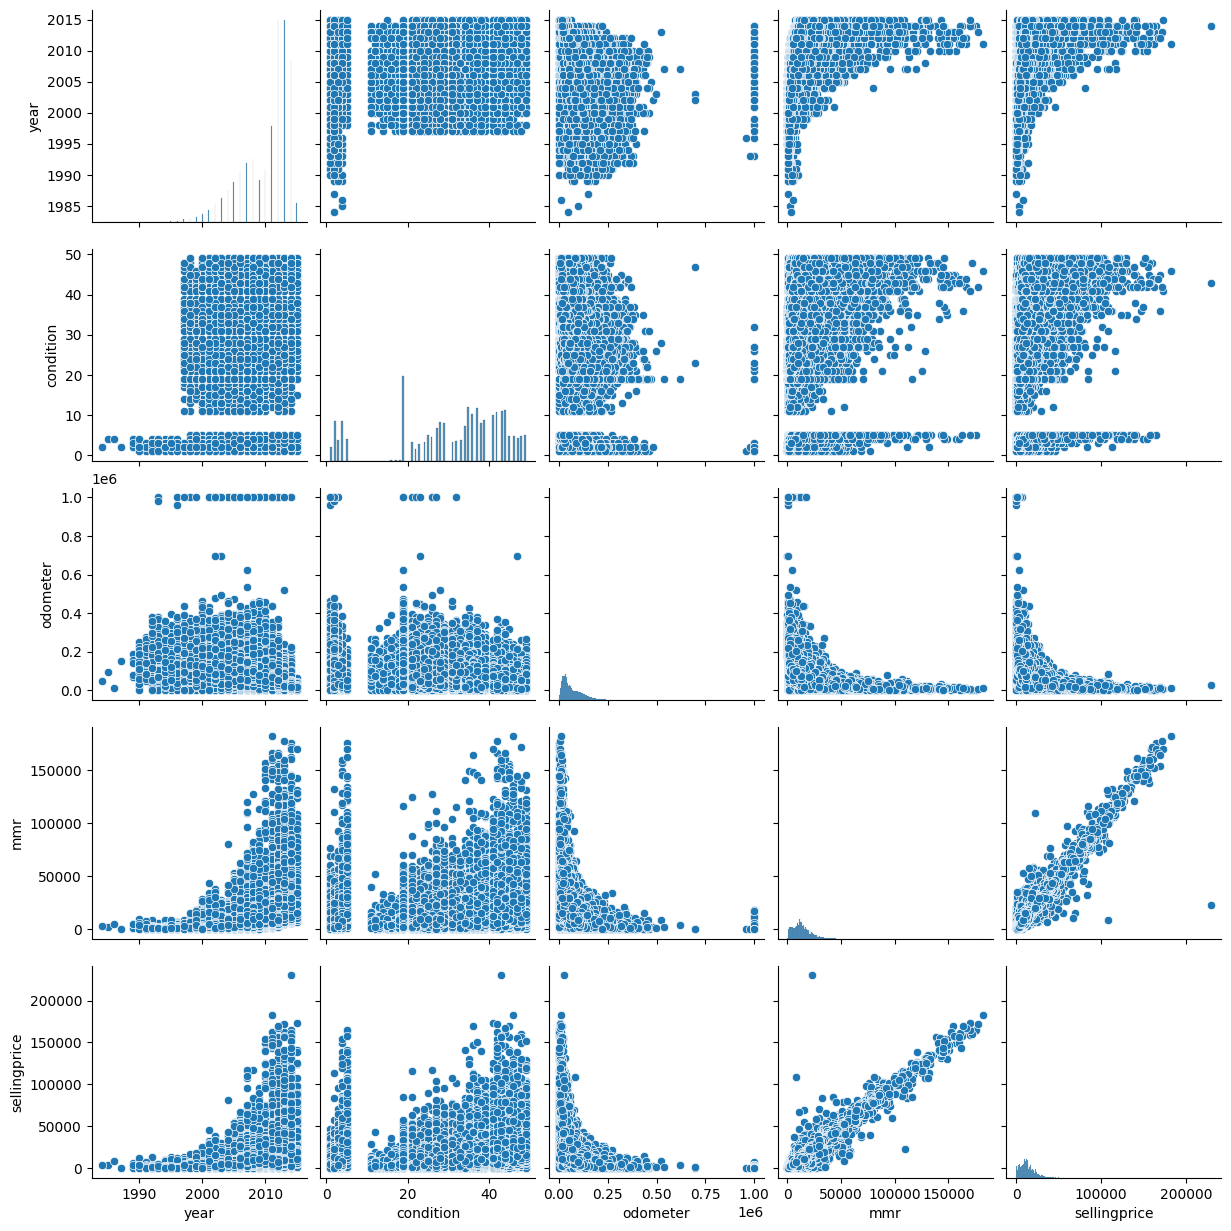

In [82]:
sns.pairplot(df)

In [83]:
import statsmodels.formula.api as smf
formula = "sellingprice ~ mmr + odometer + condition + year + transmission + make"

full_model = smf.ols(formula=formula, data=df).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 1.576e+05
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:44:28   Log-Likelihood:            -4.1992e+06
No. Observations:              474954   AIC:                         8.399e+06
Df Residuals:                  474856   BIC:                         8.400e+06
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                9.34e+04   2295.203     40.695      0.000    8.89e+04    9.79e+04
transmission[T.manual]  -212.6714     13.669    -15.559      0.000    -239.462    -185.881
make[T.Aston Martin]    1677.2173    342.826      4.892      0.000    1005.289    2349.146
make[T.Audi]            -108.7606     34.772     -3.128      0.002    -176.913     -40.608
make[T.BMW]             -103.4561     28.063     -3.687      0.000    -158.459     -48.453
make[T.Bentley]         -710.5984    166.876     -4.258      0.000   -1037.669    -383.527
make[T.Buick]           -152.0574     35.361     -4.300      0.000    -221.363     -82.752
make[T.Cadillac]        -102.3867     32.643     -3.137      0.002    -166.365     -38.408
make[T.Chevrolet]        -38.9774     26.052     -1.496      0.135     -90.038      12.083
make[T.Chrysler]         -57.9514     28.573     -2.028      0.043    -113.954      -1.949
make[T.Daewoo]          -170.8574   1183.392     -0.144      0.885   -2490.270    2148.555
make[T.Dodge]            -56.8853     27.080     -2.101      0.036    -109.962      -3.809
make[T.FIAT]             167.9437     67.311      2.495      0.013      36.016     299.872
make[T.Ferrari]         -434.9768    409.017     -1.063      0.288   -1236.637     366.683
make[T.Fisker]         -2225.4401    558.399     -3.985      0.000   -3319.884   -1130.996
make[T.Ford]            -209.7373     25.732     -8.151      0.000    -260.171    -159.304
make[T.GMC]              -43.4592     30.444     -1.428      0.153    -103.128      16.210
make[T.Geo]              230.1078    419.136      0.549      0.583    -591.385    1051.601
make[T.HUMMER]           102.4066     65.369      1.567      0.117     -25.715     230.529
make[T.Honda]            -49.6366     27.158     -1.828      0.068    -102.866       3.593
make[T.Hyundai]         -222.3631     28.044     -7.929      0.000    -277.328    -167.398
make[T.Infiniti]        -119.5271     28.770     -4.155      0.000    -175.916     -63.139
make[T.Isuzu]            -46.3044    127.598     -0.363      0.717    -296.393     203.784
make[T.Jaguar]          -364.5735     53.474     -6.818      0.000    -469.380    -259.767
make[T.Jeep]             -52.5620     29.054     -1.809      0.070    -109.508       4.384
make[T.Kia]             -189.1674     28.571     -6.621      0.000    -245.166    -133.168
make[T.Lamborghini]    -1318.5711    967.130     -1.363      0.173   -3214.115     576.973
make[T.Land Rover]      -173.9642     52.778     -3.296      0.001    -277.407     -70.522
make[T.Lexus]            -77.8370     29.924     -2.601      0.009    -136.488     -19.186
make[T.Lincoln]         -205.6592     34.499     -5.961      0.000    -273.275    -138.043
make[T.Lotus]           1062.6971   1673.424      0.635      0.525   -2217.162  

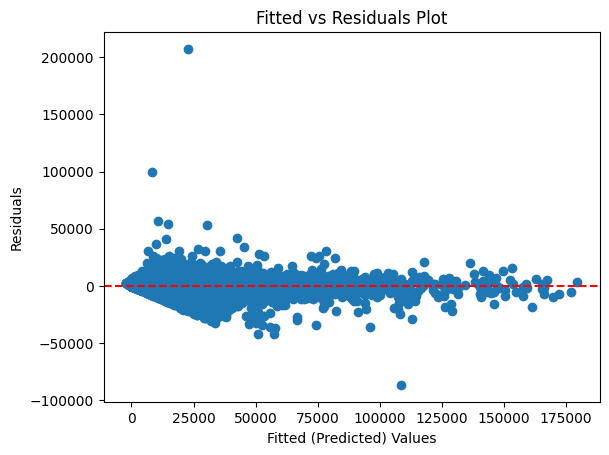

In [84]:
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residuals Plot")
plt.show()

I do not see a need to transform this model because it passes the linear assumption test pretty well already I do not see any major changes that will improve this at this time.

Numericals: mmr, odometer, condition
categoricals: year, transmission, make

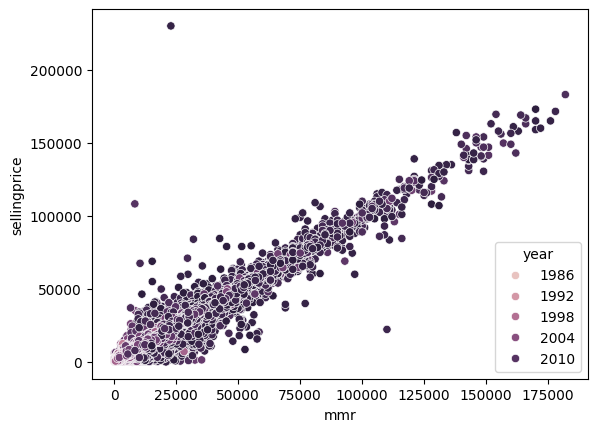

In [85]:
sns.scatterplot(x='mmr', y='sellingprice', hue='year', data=df)
plt.show()

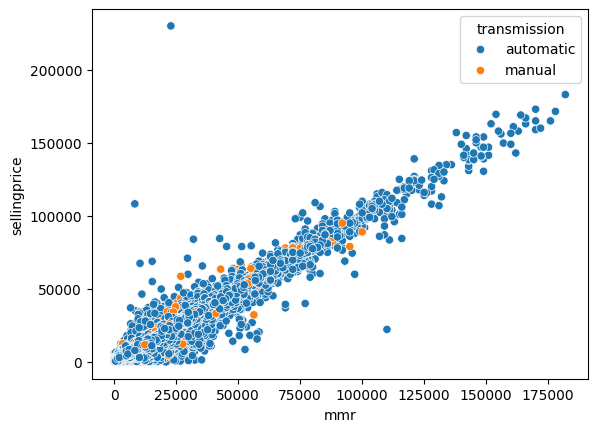

In [86]:
sns.scatterplot(x='mmr', y='sellingprice', hue='transmission', data=df)
plt.show()

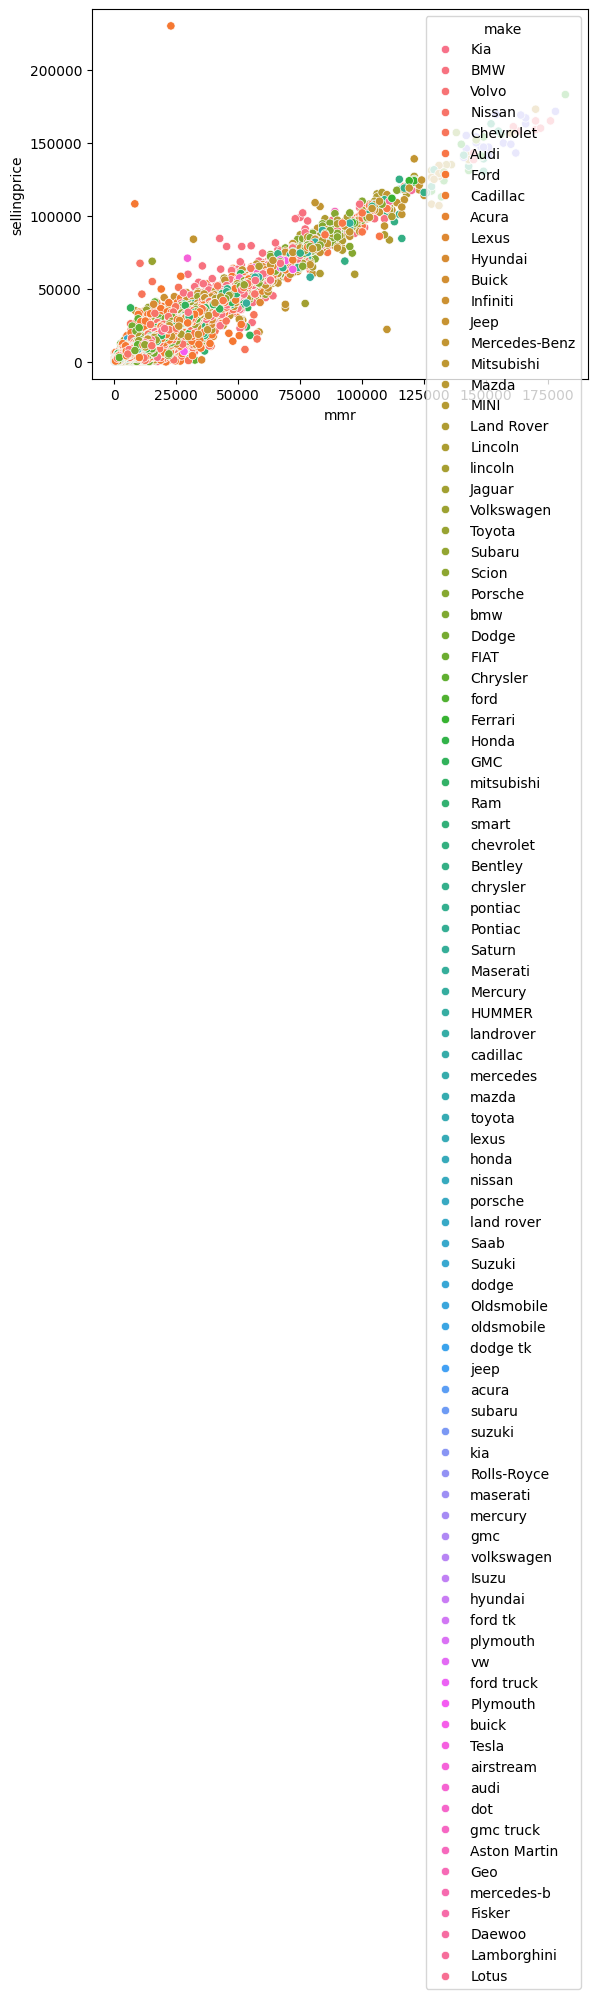

In [87]:
sns.scatterplot(x='mmr', y='sellingprice', hue='make', data=df)
plt.show()

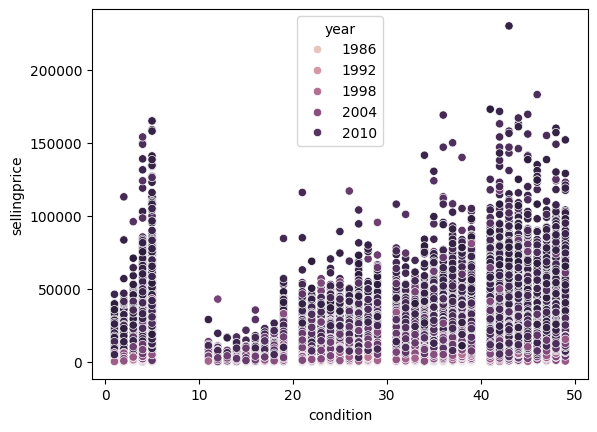

In [88]:
sns.scatterplot(x='condition', y='sellingprice', hue='year', data=df)
plt.show()

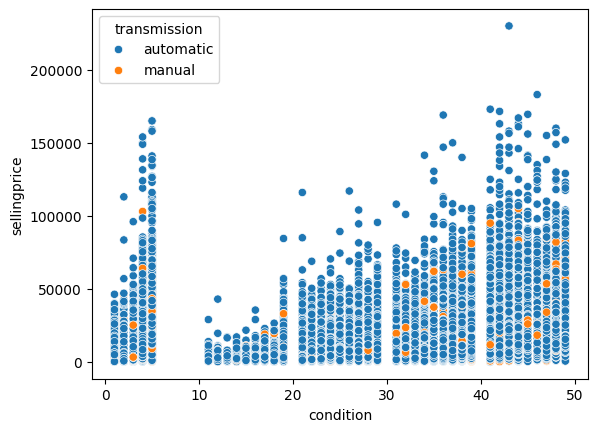

In [89]:
sns.scatterplot(x='condition', y='sellingprice', hue='transmission', data=df)
plt.show()

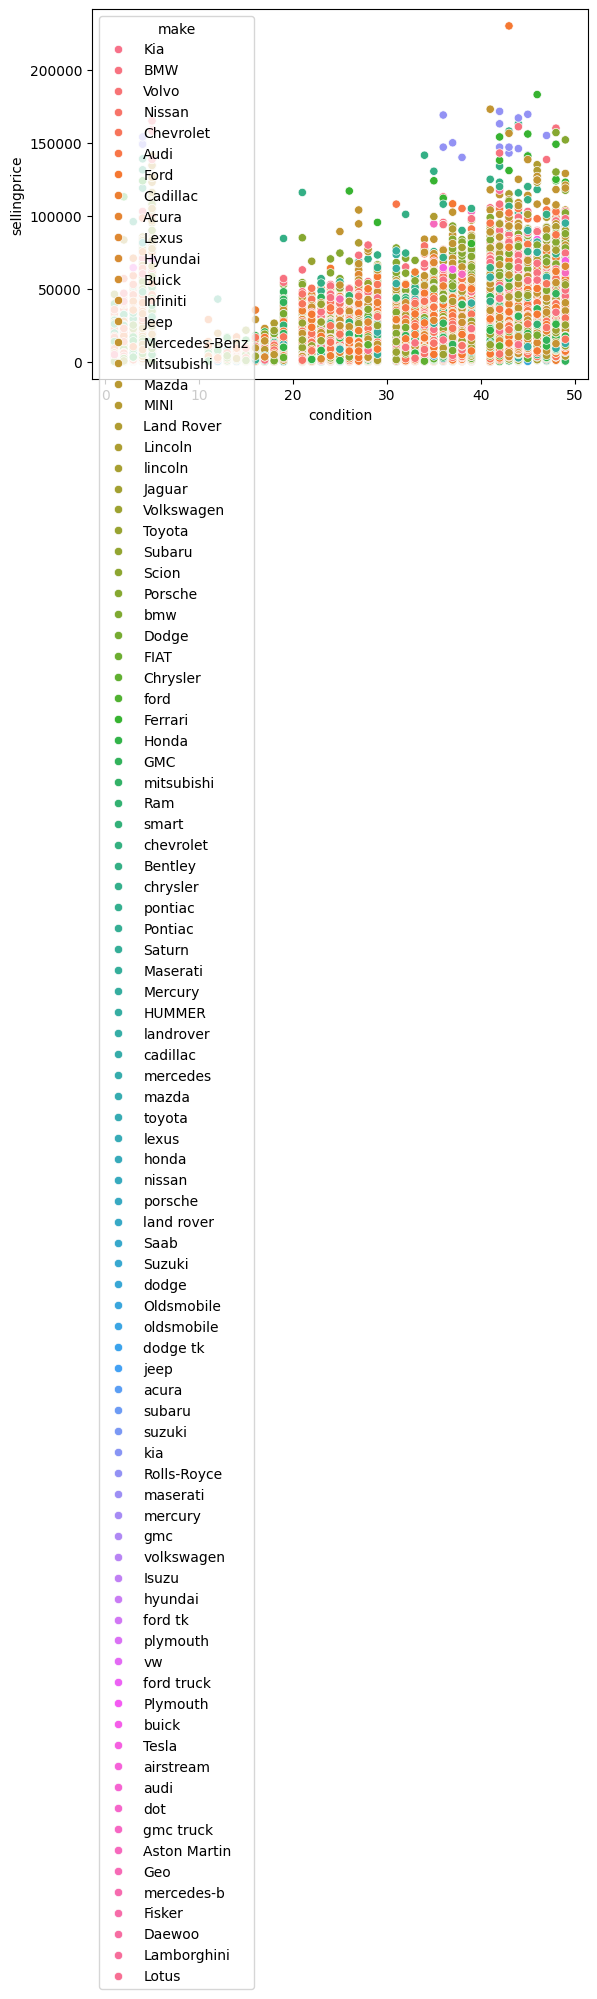

In [90]:
sns.scatterplot(x='condition', y='sellingprice', hue='make', data=df)
plt.show()

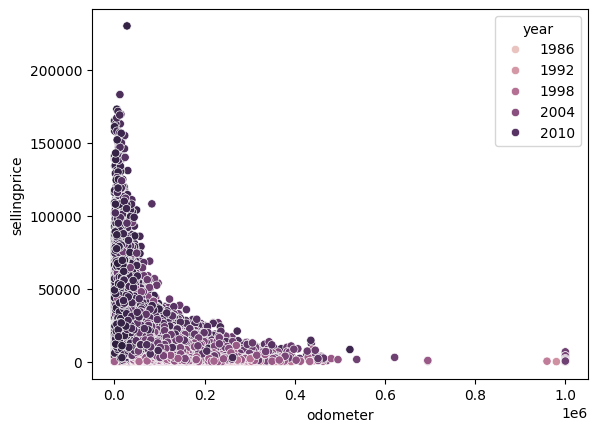

In [93]:
sns.scatterplot(x='odometer', y='sellingprice', hue='year', data=df)
plt.show()

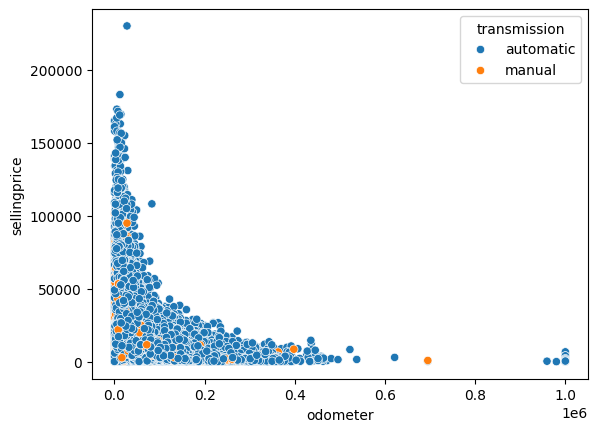

In [91]:
sns.scatterplot(x='odometer', y='sellingprice', hue='transmission', data=df)
plt.show()

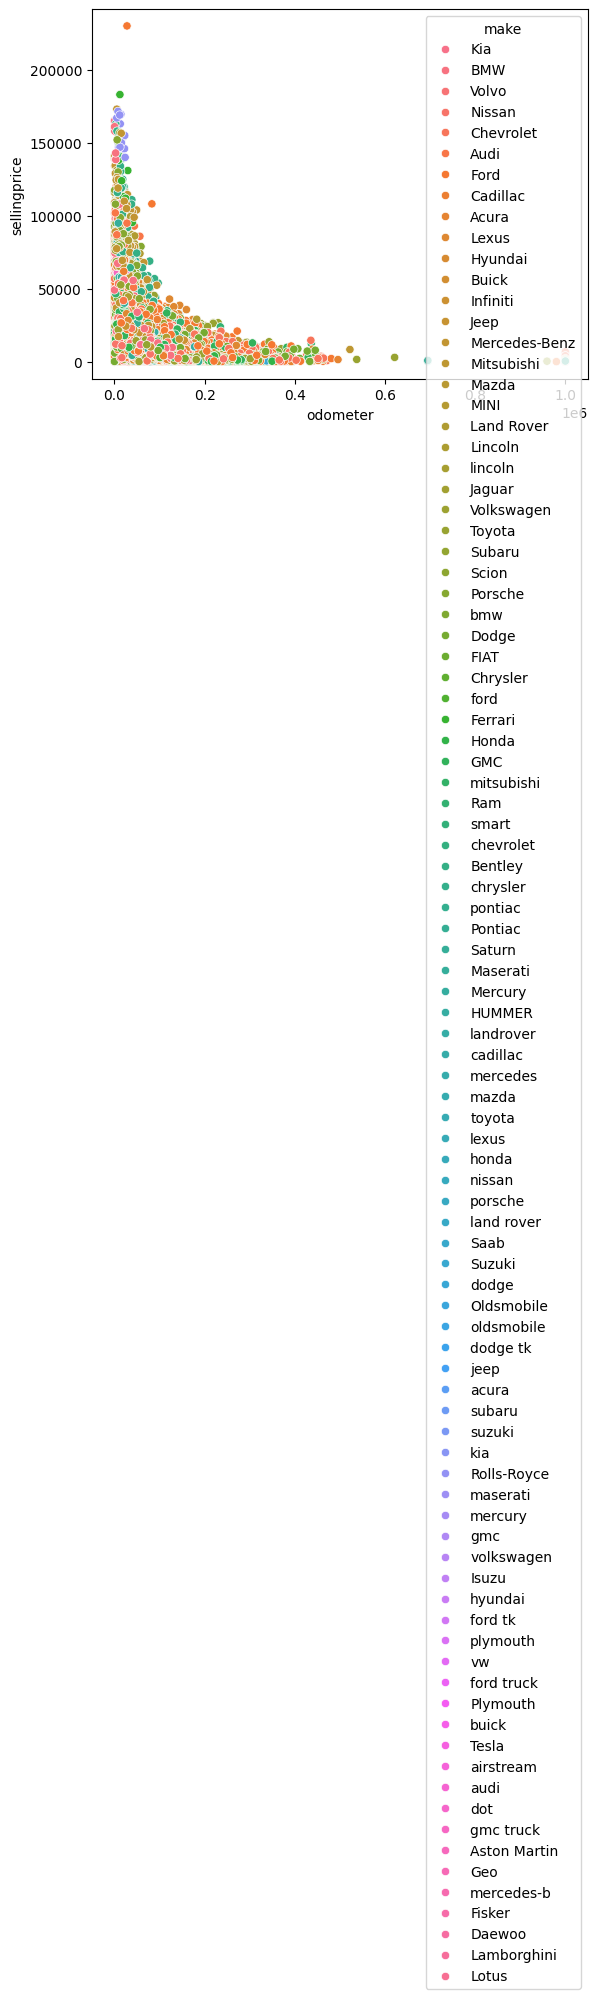

In [92]:
sns.scatterplot(x='odometer', y='sellingprice', hue='make', data=df)
plt.show()

## 5. Predictive Models

I am going to use year, transmission, odometer, mmr, make, and condition to predict the 'selling price' for new datasets. I am deciding to use the backwards elimination method for this analysis. To get there, I first made a linear regression model to get my first prediction option. Then, I used the train-test split method. I then scaled the train and test numerical variables. After this, I performed the backwards elimination method. I removed one variable from each test and tested the adjusted rsquared, because this is what is more accurate for the backwards elimination method. After I did one round of this, I discovered that no number was higher than the original, so I stopped the loop. I then created a interaction model, with mmr and all three categorical variables, because it showed high correlation in the tests above.

In [94]:
vars = ["year", "condition", "odometer",'mmr', 'make', 'transmission', 'sellingprice']
df = df[vars]

df

,year,condition,odometer,mmr,make,transmission,sellingprice
0,2015,5.0,16639.0,20500.0,Kia,automatic,21500.0
1,2015,5.0,9393.0,20800.0,Kia,automatic,21500.0
2,2014,45.0,1331.0,31900.0,BMW,automatic,30000.0
3,2015,41.0,14282.0,27500.0,Volvo,automatic,27750.0
4,2014,43.0,2641.0,66000.0,BMW,automatic,67000.0
...,...,...,...,...,...,...,...
558831,2011,39.0,66403.0,20300.0,BMW,automatic,22800.0
558833,2012,5.0,54393.0,30200.0,Ram,automatic,30800.0
558834,2012,48.0,50561.0,29800.0,BMW,automatic,34000.0
558835,2015,38.0,16658.0,15100.0,Nissan,automatic,11100.0


In [95]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=207)
print(df_train.shape[0]/df.shape[0])
df_train

0.7999995789065889


,year,condition,odometer,mmr,make,transmission,sellingprice
140893,2012,44.0,35164.0,15450.0,Honda,automatic,16200.0
280180,2007,34.0,101482.0,4150.0,Pontiac,automatic,5500.0
421564,2008,27.0,99737.0,10200.0,BMW,automatic,10900.0
371098,2010,19.0,109114.0,4775.0,Chrysler,automatic,3200.0
495138,2013,35.0,14375.0,21900.0,Infiniti,automatic,20000.0
...,...,...,...,...,...,...,...
250292,2012,37.0,38755.0,11750.0,Nissan,automatic,12200.0
70126,2012,3.0,52625.0,6975.0,Ford,automatic,8000.0
284979,2012,44.0,32830.0,25600.0,Infiniti,automatic,25000.0
233633,2002,23.0,160009.0,1975.0,Honda,automatic,2400.0


In [96]:
print(df_test.shape[0]/df.shape[0])
df_test.head()

0.20000042109341115


,year,condition,odometer,mmr,make,transmission,sellingprice
283715,2013,48.0,20077.0,15750.0,Mazda,automatic,16700.0
338723,2011,25.0,59259.0,12000.0,Chrysler,automatic,10000.0
340598,2003,19.0,240077.0,7425.0,Chevrolet,manual,3750.0
176315,2010,32.0,63877.0,15550.0,Audi,automatic,20250.0
299891,2012,37.0,133309.0,13600.0,Toyota,automatic,12600.0


In [97]:
X_train = df_train.drop(["sellingprice"], axis=1)
X_train.head()

,year,condition,odometer,mmr,make,transmission
140893,2012,44.0,35164.0,15450.0,Honda,automatic
280180,2007,34.0,101482.0,4150.0,Pontiac,automatic
421564,2008,27.0,99737.0,10200.0,BMW,automatic
371098,2010,19.0,109114.0,4775.0,Chrysler,automatic
495138,2013,35.0,14375.0,21900.0,Infiniti,automatic


In [98]:
y_train=df_train["sellingprice"]
y_train.head()

140893    16200.0
280180     5500.0
421564    10900.0
371098     3200.0
495138    20000.0
Name: sellingprice, dtype: float64

In [99]:
X_test = df_test.drop(["sellingprice"], axis=1)
X_test.head()

,year,condition,odometer,mmr,make,transmission
283715,2013,48.0,20077.0,15750.0,Mazda,automatic
338723,2011,25.0,59259.0,12000.0,Chrysler,automatic
340598,2003,19.0,240077.0,7425.0,Chevrolet,manual
176315,2010,32.0,63877.0,15550.0,Audi,automatic
299891,2012,37.0,133309.0,13600.0,Toyota,automatic


In [100]:
y_test=df_test["sellingprice"]
y_test.head()

283715    16700.0
338723    10000.0
340598     3750.0
176315    20250.0
299891    12600.0
Name: sellingprice, dtype: float64

scaling the features matrices

In [102]:
vars = ["condition", "odometer",'mmr']
X_train_numericals = X_train[vars]
X_train_numericals

,condition,odometer,mmr
140893,44.0,35164.0,15450.0
280180,34.0,101482.0,4150.0
421564,27.0,99737.0,10200.0
371098,19.0,109114.0,4775.0
495138,35.0,14375.0,21900.0
...,...,...,...
250292,37.0,38755.0,11750.0
70126,3.0,52625.0,6975.0
284979,44.0,32830.0,25600.0
233633,23.0,160009.0,1975.0


In [103]:
from sklearn.preprocessing import StandardScaler

Scaler_training = StandardScaler()
scaled_expl_vars = Scaler_training.fit_transform(X_train_numericals)

X_train = pd.DataFrame(scaled_expl_vars, columns=X_train_numericals.columns)
X_train.head()

,condition,odometer,mmr
0,0.995246,-0.608731,0.168842
1,0.242872,0.666681,-1.012550
2,-0.283790,0.633122,-0.380035
3,-0.885689,0.813458,-0.947208
4,0.318109,-1.008540,0.843177


Sclaing the test features matrix

In [104]:
vars = ["condition", "odometer",'mmr']
X_test_numericals = X_test[vars]
X_test_numericals

,condition,odometer,mmr
283715,48.0,20077.0,15750.0
338723,25.0,59259.0,12000.0
340598,19.0,240077.0,7425.0
176315,32.0,63877.0,15550.0
299891,37.0,133309.0,13600.0
...,...,...,...
317961,44.0,47999.0,35700.0
32908,3.0,57340.0,16600.0
52403,34.0,46520.0,12800.0
92562,1.0,157188.0,2450.0


In [106]:
scaled_expl_vars = Scaler_training.transform(X_test_numericals)
X_test = pd.DataFrame(scaled_expl_vars, columns = X_test_numericals.columns)
X_test.head()

,condition,odometer,mmr
0,1.296195,-0.898880,0.200206
1,-0.434265,-0.145341,-0.191849
2,-0.885689,3.332107,-0.670156
3,0.092397,-0.056529,0.179297
4,0.468584,1.278770,-0.024572


check for multicollinearlity

In [107]:
X_train.corr()

,condition,odometer,mmr
condition,1.000000,-0.316598,0.277958
odometer,-0.316598,1.000000,-0.582722
mmr,0.277958,-0.582722,1.000000


Non regularized linear regression model

In [108]:
from sklearn.linear_model import LinearRegression

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)

LinearRegression()

testing the model

In [109]:
lin_reg_mod.score(X_test, y_test)

0.9713153782059376

In [114]:
full_model.rsquared

0.9698778776265088

transmission and mmr have a strong correlation. so i am going to create an interaction term with this.

In [142]:
formula = "sellingprice ~ mmr + odometer + condition + year +make+ transmission + mmr:transmission + mmr:make+ mmr:year"

interaction_model = smf.ols(formula=formula, data=df).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 8.295e+04
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:15:12   Log-Likelihood:            -4.1983e+06
No. Observations:              474954   AIC:                         8.397e+06
Df Residuals:                  474768   BIC:                         8.399e+06
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.148e+05   2582.580     44.456      0.000     1.1e+05     1.2e+05
make[T.Aston Martin]       -3364.3351   1477.792     -2.277      0.023   -6260.762    -467.908
make[T.Audi]                -212.7666     60.366     -3.525      0.000    -331.082     -94.451
make[T.BMW]                 -215.1084     50.141     -4.290      0.000    -313.383    -116.834
make[T.Bentley]             3392.5264    423.263      8.015      0.000    2562.944    4222.108
make[T.Buick]               -449.8562     61.345     -7.333      0.000    -570.090    -329.622
make[T.Cadillac]            -298.3351     55.920     -5.335      0.000    -407.937    -188.733
make[T.Chevrolet]           -148.8287     46.466     -3.203      0.001    -239.900     -57.757
make[T.Chrysler]            -366.2130     51.705     -7.083      0.000    -467.553    -264.872
make[T.Daewoo]             -1.832e+04   4.61e+04     -0.398      0.691   -1.09e+05     7.2e+04
make[T.Dodge]               -276.1378     49.297     -5.602      0.000    -372.758    -179.518
make[T.FIAT]               -1222.7981    302.674     -4.040      0.000   -1816.029    -629.567
make[T.Ferrari]             4429.4582   2361.007      1.876      0.061    -198.043    9056.959
make[T.Fisker]             -9493.0630   9507.351     -0.998      0.318   -2.81e+04    9141.051
make[T.Ford]                -183.6623     46.447     -3.954      0.000    -274.698     -92.627
make[T.GMC]                  -93.7229     56.118     -1.670      0.095    -203.713      16.268
make[T.Geo]                  379.0295   1447.604      0.262      0.793   -2458.230    3216.289
make[T.HUMMER]              -445.1163    170.453     -2.611      0.009    -779.199    -111.033
make[T.Honda]                 47.8107     49.202      0.972      0.331     -48.624     144.246
make[T.Hyundai]             -143.2984     53.199     -2.694      0.007    -247.567     -39.030
make[T.Infiniti]            -169.3973     60.384     -2.805      0.005    -287.747     -51.048
make[T.Isuzu]                 24.9568    221.116      0.113      0.910    -408.423     458.337
make[T.Jaguar]              -253.1768     81.306     -3.114      0.002    -412.534     -93.819
make[T.Jeep]                -314.9980     52.909     -5.954      0.000    -418.697    -211.298
make[T.Kia]                 -183.3962     55.452     -3.307      0.001    -292.080     -74.712
make[T.Lamborghini]           62.7804   2.44e+04      0.003      0.998   -4.77e+04    4.79e+04
make[T.Land Rover]            26.8391     97.901      0.274      0.784    -165.045     218.723
make[T.Lexus]                 65.3589     56.539      1.156      0.248     -45.455     176.173
make[T.Lincoln]             -243.2471     66.236     -3.672      0.000    -373.067    -113.427
make[T.Lotus]                4.55e-08   2.1

In [143]:
interaction_model.rsquared

0.9699892902333107

Baackwards elimination without interaction terms

In [126]:
current_model = smf.ols(formula="sellingprice ~ mmr + odometer + condition + year +make+ transmission", data=df_train).fit()
current_model.rsquared_adj


0.9694744560919532

In [127]:
#without mmr
test_model = smf.ols(formula="sellingprice ~ odometer + condition + year +make+ transmission", data=df_train).fit()
test_model.rsquared_adj

0.5820973148000488

In [128]:
#without odometer
test_model = smf.ols(formula="sellingprice ~ mmr + condition + year +make+ transmission", data=df_train).fit()
test_model.rsquared_adj

0.9694522782890796

In [129]:
#without condition
test_model = smf.ols(formula="sellingprice ~ mmr + odometer  + year +make+ transmission", data=df_train).fit()
test_model.rsquared_adj

0.9671431678098512

In [130]:
#without year
test_model = smf.ols(formula="sellingprice ~ mmr + odometer + condition  +make+ transmission", data=df_train).fit()
test_model.rsquared_adj

0.9693667973821251

In [131]:
#without make
test_model = smf.ols(formula="sellingprice ~ mmr + odometer + condition + year + transmission", data=df_train).fit()
test_model.rsquared_adj

0.9693525689106435

In [132]:
#without transmission
test_model = smf.ols(formula="sellingprice ~ mmr + odometer + condition + year +make", data=df_train).fit()
test_model.rsquared_adj

0.9694588918601181

since none of these models are higher than the current model, we stop the loop and keep with our current model.

In [133]:
current_model = smf.ols(formula="sellingprice ~ mmr + odometer + condition + year +make+ transmission", data=df_train).fit()
current_model.rsquared_adj

0.9694744560919532

## 6. Best Model Discussion

I am now going to compare all three models I have created. The full model, the interaction model, and the current model, which is the fitted model with no interaction terms.

In [136]:
full_model.rsquared

0.9698778776265088

In [139]:
interaction_model.rsquared

0.9699892902333107

In [138]:
current_model.rsquared

0.9694822489179702

Out of all three models, lin_reg_model, fitted model with interaction variables, and fitted model with no interaction, the one with the highest model is the interaction model. This is the best model for predicting new datasets.

Looking at the *test* rsquared. 

In [144]:
final_model = smf.ols(formula="sellingprice ~ mmr + odometer + condition + year +make+ transmission + mmr:transmission + mmr:make+ mmr:year", data=df_test).fit()
final_model.rsquared

0.9716925650208136

Looks like the test rsquared is the best yet! I am going to keep this as the final model with the highest predictability. 

I am going to find which Explanatory variables are the most important based on the slope magnitudes: I am going to use the params function to look at who has the highest, and decide from there. 

In [148]:
import statsmodels.api as sm
coefficients = final_model.params
print(coefficients)

Intercept               112753.390460
make[T.Aston Martin]      3733.782631
make[T.Audi]              -225.738295
make[T.BMW]               -220.397159
make[T.Bentley]          -1956.812750
                            ...      
mmr:make[T.vw]               0.028859
odometer                    -0.001023
condition                   39.255407
year                       -56.528073
mmr:year                     0.002248
Length: 170, dtype: float64


In [152]:
absolute_coefficients = abs(coefficients)
sorted_coefficients = absolute_coefficients.sort_values(ascending=False)
n = 5
top_variables = sorted_coefficients.head(n)

print(top_variables)

make[T.Rolls-Royce]    213076.942232
make[T.Ferrari]        167106.559935
Intercept              112753.390460
make[T.Fisker]          79281.308337
make[T.Tesla]           18585.211390
dtype: float64


These are the top coefficients, so having 4/5 of the top be from the variable make, I think the explanatory variable 'make'(type of car) is most important based on slope magnitudes. 

## 7. Conclusion

In conclusion, based on my analysis, I have created a strong predictive model that can strongly predict the selling price for new datasets using these specific variables. I discovered that adding interaction variables helped my model, and that this would end up being the best fit model for new datasets. I would recommend my analysis to anyone who is looking to sell their car, or anyone trying to buy a car, and to anyone who is interested on how cars are priced. No, I do not know for sure that I made the best r2, because I did not try any other regression models, like lasso or ridge, or even cross validation. Maybe I could have done more with the slopes of the variables, and played around with the log regression too. But, for what I decided to do, I think I made a strong model using interaction terms that has a r2 of .97. So I would say a shortcoming is not trying other regression models, and experimenting with the slopes more. 